In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

glassdata = pd.read_csv('./glass.csv') 
print(glassdata)
print(np.unique(glassdata['Type']))
# Notice that in the description, it has 1-7 types, but the dataset does not have Type 4

          RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.00     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.00     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.00     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.00     1
5    1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00  0.26     1
6    1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.00  0.00     1
7    1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.00  0.00     1
8    1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.00  0.00     1
9    1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.00  0.11     1
10   1.51571  12.72  3.46  1.56  73.20  0.67  8.09  0.00  0.24     1
11   1.51763  12.80  3.66  1.27  73.01  0.60  8.56  0.00  0.00     1
12   1.51589  12.88  3.43  1.40  73.28  0.69  8.05  0.00  0.24     1
13   1.51748  12.86  3.56  1.27  7

In [3]:
glassdata.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
print ((glassdata['Ba']==0).sum()/len(glassdata))
print ((glassdata['Fe']==0).sum()/len(glassdata))

0.822429906542056
0.6728971962616822


In [5]:
glassdata.drop('Ba',axis=1,inplace=True)
glassdata.drop('Fe',axis=1,inplace=True)

In [6]:
print(glassdata)

          RI     Na    Mg    Al     Si     K    Ca  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07     1
5    1.51596  12.79  3.61  1.62  72.97  0.64  8.07     1
6    1.51743  13.30  3.60  1.14  73.09  0.58  8.17     1
7    1.51756  13.15  3.61  1.05  73.24  0.57  8.24     1
8    1.51918  14.04  3.58  1.37  72.08  0.56  8.30     1
9    1.51755  13.00  3.60  1.36  72.99  0.57  8.40     1
10   1.51571  12.72  3.46  1.56  73.20  0.67  8.09     1
11   1.51763  12.80  3.66  1.27  73.01  0.60  8.56     1
12   1.51589  12.88  3.43  1.40  73.28  0.69  8.05     1
13   1.51748  12.86  3.56  1.27  73.21  0.54  8.38     1
14   1.51763  12.61  3.59  1.31  73.29  0.58  8.50     1
15   1.51761  12.81  3.54  1.23  73.24  0.58  8.39     1
16   1.51784  12.68  3.67  1.16

In [2]:
Y=glassdata.iloc[:,-1:]
X=glassdata.iloc[:,:-1]
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002170849A470>,
      dtype=object)

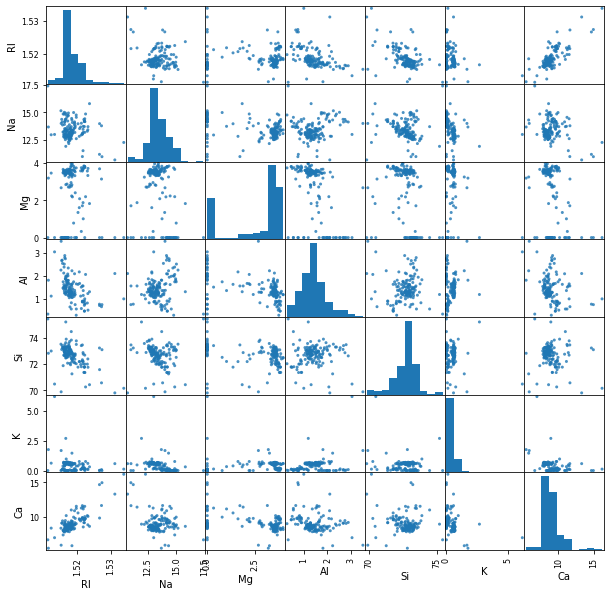

In [8]:
pd.plotting.scatter_matrix(X_train, alpha=0.8, figsize=(10, 10))

In [14]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf',C=0.8)

svm.fit(X_train, y_train.values.flatten())
y_pred=svm.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


0.6307692307692307
[[15  3  0  0  0  0]
 [11 19  0  0  0  0]
 [ 4  0  0  0  0  0]
 [ 0  3  0  2  0  0]
 [ 1  1  0  0  0  0]
 [ 0  1  0  0  0  5]]
              precision    recall  f1-score   support

           1       0.48      0.83      0.61        18
           2       0.70      0.63      0.67        30
           3       0.00      0.00      0.00         4
           5       1.00      0.40      0.57         5
           6       0.00      0.00      0.00         2
           7       1.00      0.83      0.91         6

    accuracy                           0.63        65
   macro avg       0.53      0.45      0.46        65
weighted avg       0.63      0.63      0.61        65



C:\Users\SHAILESH\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SHAILESH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


https://www.oreilly.com/library/view/python-end-to-end-data/9781788394697/ch18s03.html

In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=5, random_state=0)

model.fit(X_train, y_train.values.flatten())
y_pred=model.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

0.6923076923076923
[[12  5  1  0  0  0]
 [ 5 22  2  0  0  1]
 [ 3  0  1  0  0  0]
 [ 0  3  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
              precision    recall  f1-score   support

           1       0.60      0.67      0.63        18
           2       0.73      0.73      0.73        30
           3       0.25      0.25      0.25         4
           5       1.00      0.40      0.57         5
           6       1.00      1.00      1.00         2
           7       0.86      1.00      0.92         6

    accuracy                           0.69        65
   macro avg       0.74      0.67      0.68        65
weighted avg       0.71      0.69      0.69        65



C:\Users\SHAILESH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
